# Impact of Weather on Taxi Pickup Durations: A Statistical Analysis of Dropoff Locations and Company Performance

We are analyzing the data from a collection of taxi companies and their records for drop offs. We used hiostograms to display the trends we observed and came to a conclusion after performing a t-test on whether bad weather affects pickup rates or duration of the pickups.

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from scipy import stats
import seaborn as sns

In [2]:
df = pd.read_csv("/datasets/project_sql_result_01.csv")
df.head()

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasing,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299


In [3]:
df2 = pd.read_csv("/datasets/project_sql_result_04.csv")
df2.head()

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000


printed the tables.

For these two datasets you now need to

import the files
study the data they contain
make sure the data types are correct
identify the top 10 neighborhoods in terms of drop-offs
make graphs: taxi companies and number of rides, top 10 neighborhoods by number of dropoffs
draw conclusions based on each graph and explain the results

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


In [5]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


In [6]:
df.duplicated()

0     False
1     False
2     False
3     False
4     False
      ...  
59    False
60    False
61    False
62    False
63    False
Length: 64, dtype: bool

checked the info data for both tables.

In [7]:
df = df.dropna()

In [8]:
df2.duplicated()

0     False
1     False
2     False
3     False
4     False
      ...  
89    False
90    False
91    False
92    False
93    False
Length: 94, dtype: bool

In [9]:
df2 = df2.dropna()

Dropped the null values for both tables.

In [10]:
df.isna().sum()

company_name    0
trips_amount    0
dtype: int64

In [11]:
df2.isna().sum()

dropoff_location_name    0
average_trips            0
dtype: int64

Checked for remaining null values in both tables.

In [12]:
df.info()
df.sample(15)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.5+ KB


,company_name,trips_amount
46,3620 - 52292 David K. Cab Corp.,21
29,303 Taxi,250
20,Checker Taxi,1486
4,Taxi Affiliation Service Yellow,9299
59,4053 - 40193 Adwar H. Nikola,7
61,5874 - 73628 Sergey Cab Corp.,5
33,Metro Jet Taxi A,146
14,Patriot Taxi Dba Peace Taxi Association,2235
22,Chicago Independents,1296
5,Chicago Carriage Cab Corp,9181


In [13]:
df2.info()
df2.sample(15)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 2.2+ KB


,dropoff_location_name,average_trips
67,Auburn Gresham,15.166667
38,Armour Square,77.033333
13,Uptown,849.666667
45,Boystown,53.966667
59,Chatham,23.200000
60,New City,22.933333
44,Belmont Cragin,59.033333
7,Museum Campus,1510.000000
12,"Little Italy, UIC",863.700000
9,Sheffield & DePaul,1259.766667


In [14]:
df2['average_trips'] = df2['average_trips'].astype(int)


Changed the datatype for a column in one of the tables.

In [15]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   dropoff_location_name  94 non-null     object
 1   average_trips          94 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


In [16]:
df = df.drop_duplicates()

In [17]:
df2 = df2.drop_duplicates()

Checked for duplicates.

In [18]:
df

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasing,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299
...,...,...
59,4053 - 40193 Adwar H. Nikola,7
60,2733 - 74600 Benny Jona,7
61,5874 - 73628 Sergey Cab Corp.,5
62,2241 - 44667 - Felman Corp,3


the data types are correct.

In [19]:
df2.head()

,dropoff_location_name,average_trips
0,Loop,10727
1,River North,9523
2,Streeterville,6664
3,West Loop,5163
4,O'Hare,2546


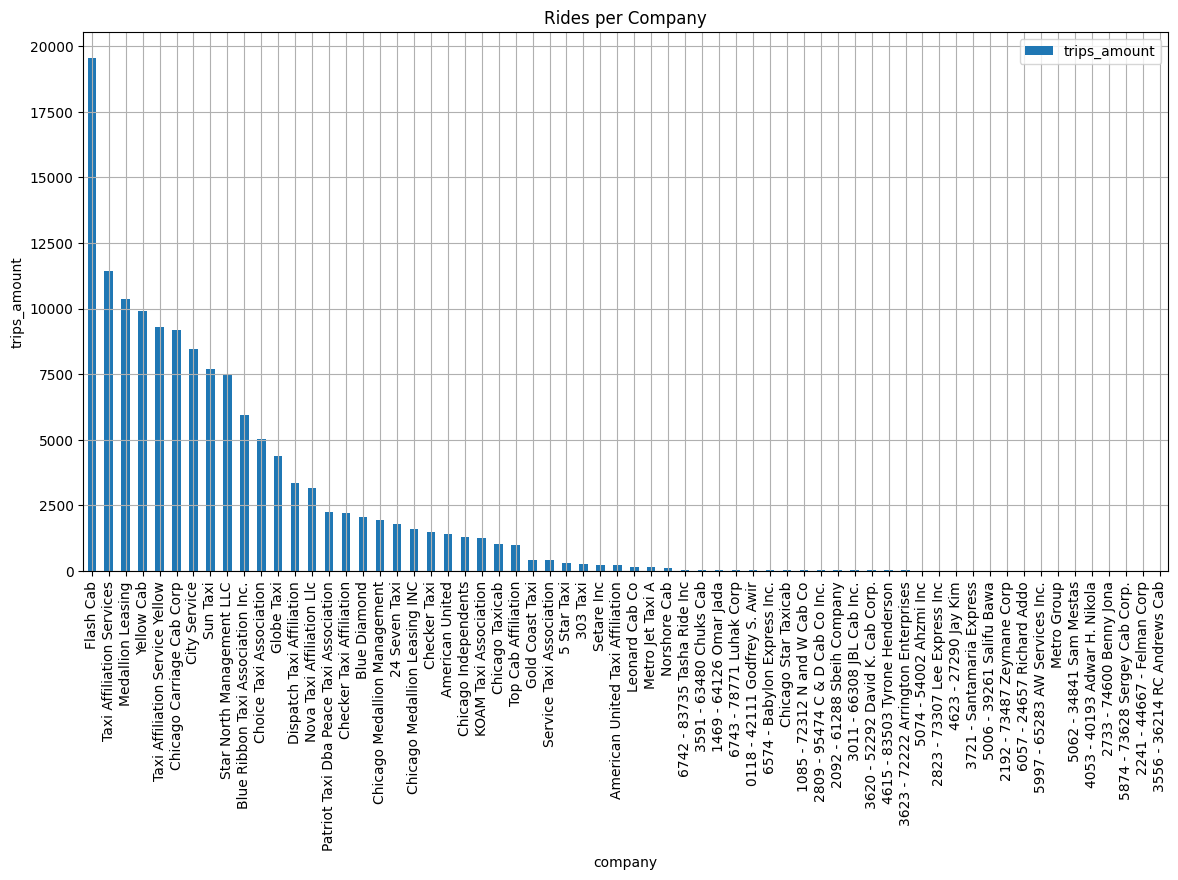

In [20]:
df.plot(kind='bar', x='company_name', y='trips_amount', xlabel='company', 
        ylabel='trips_amount', grid=True, figsize=(14,7))
plt.title('Rides per Company')
plt.show()


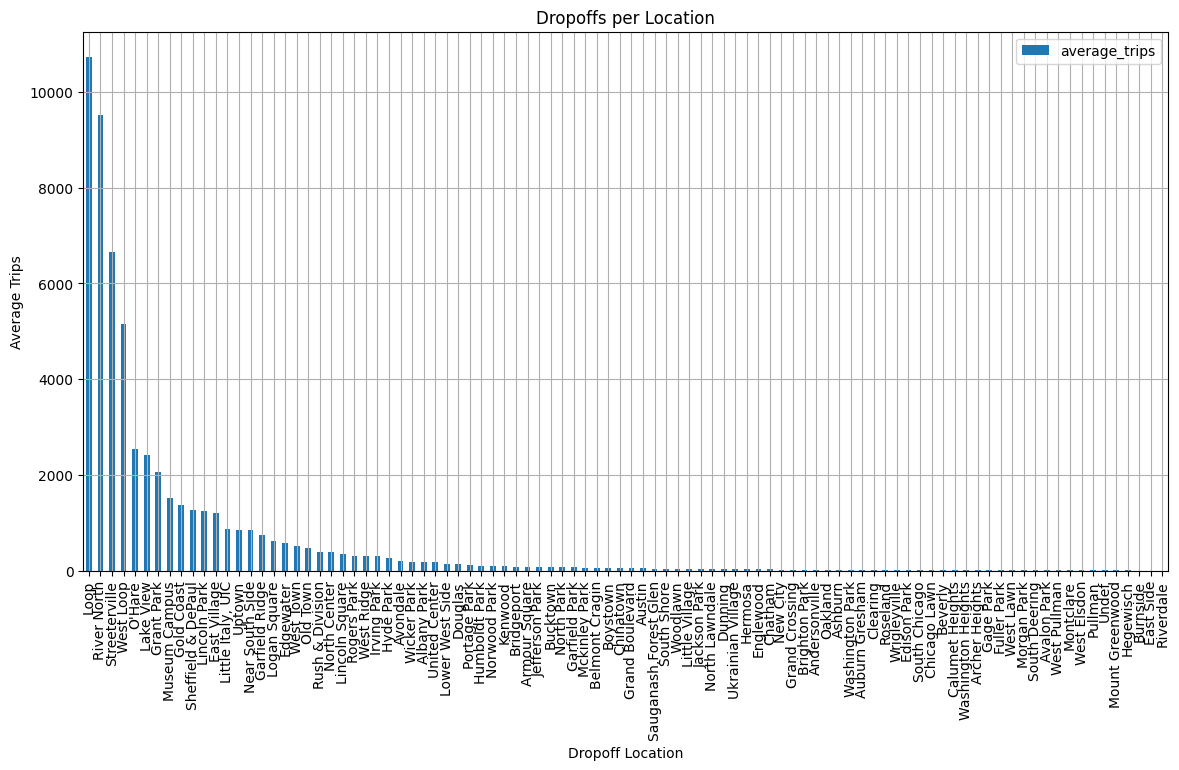

In [21]:
df2.plot(kind='bar', x='dropoff_location_name', y='average_trips', xlabel='Dropoff Location', 
        ylabel='Average Trips', grid=True, figsize=(14,7))
plt.title('Dropoffs per Location')
plt.show()


Plotted both datatables based on specifics outlined in the project instructions.

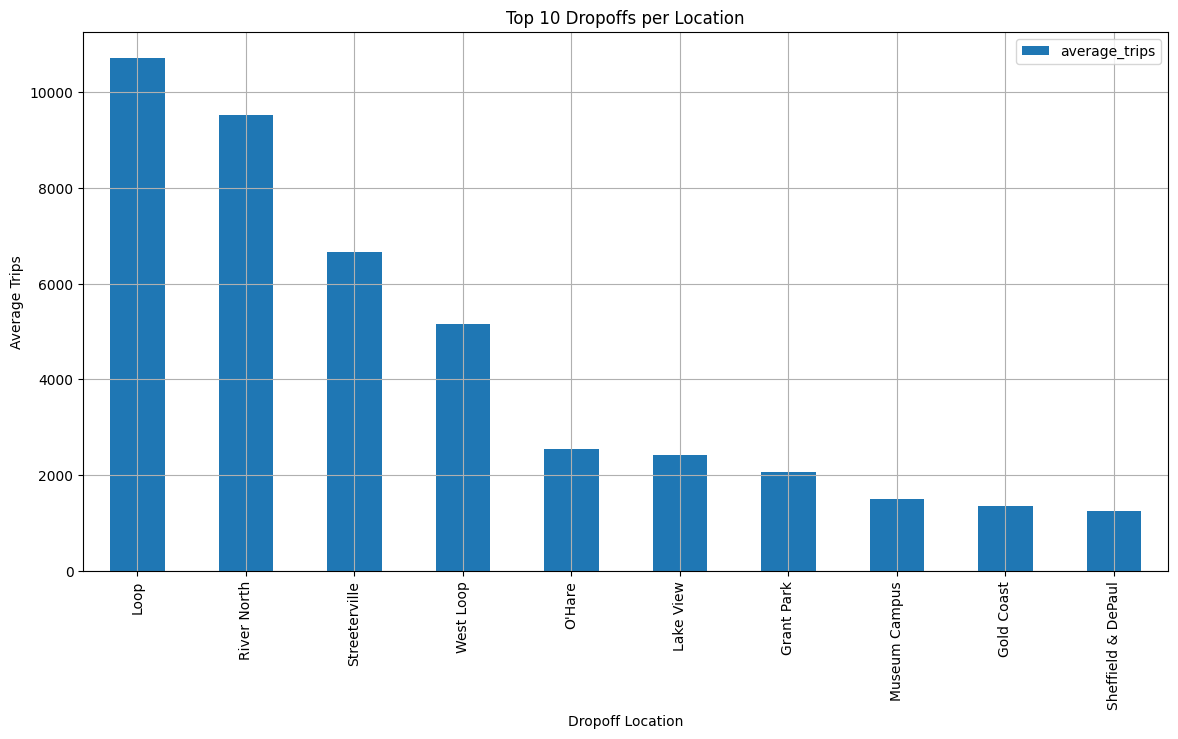

In [22]:
top_10_df2 = df2.sort_values(by='average_trips', ascending=False).head(10)
top_10_df2.plot(kind='bar', x='dropoff_location_name', y='average_trips', 
                xlabel='Dropoff Location', ylabel='Average Trips', 
                grid=True, figsize=(14,7))

plt.title('Top 10 Dropoffs per Location')
plt.show()

Plotted the top ten neighborhoods for dropoffs from its respective table. The top 10 neighborhoods are "Loop, River North, Streeterville, West Loop, O'Hare, Lake View, Grant Park, Museum Campus, Gold Coast, and Sheffield & DePaul".

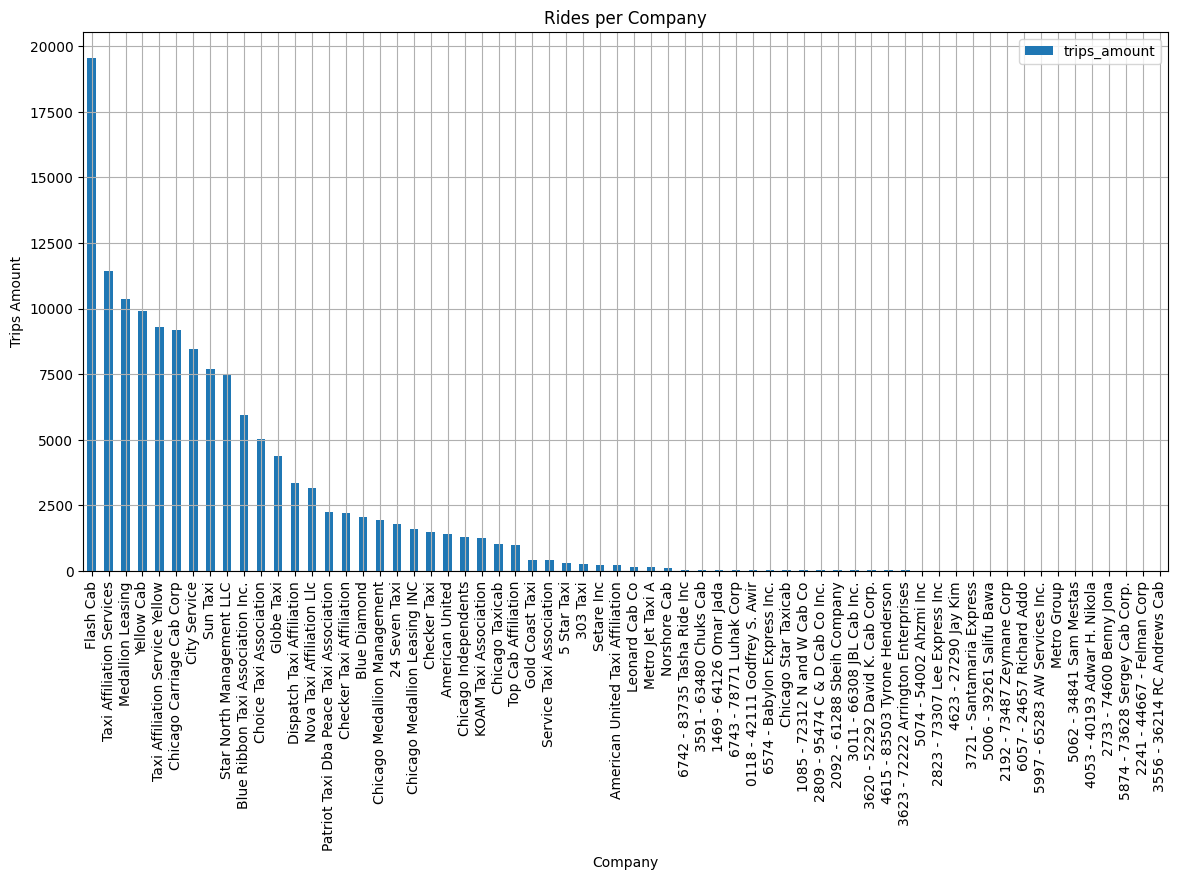

In [23]:
df_filtered = df[df['trips_amount'] > 0]

# Plotting the filtered DataFrame
df_filtered.plot(kind='bar', x='company_name', y='trips_amount', 
                xlabel='Company', ylabel='Trips Amount', 
                grid=True, figsize=(14,7))

plt.title('Rides per Company')
plt.show()


We can now see the companies that are the most profitable as well as the dropoff locations that are the most profitable and can market them accordingly.

In [24]:
df3 = pd.read_csv("/datasets/project_sql_result_07.csv")
df3.head()

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0


printed out the third datatable.

In [25]:
df3

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0
...,...,...,...
1063,2017-11-25 11:00:00,Good,0.0
1064,2017-11-11 10:00:00,Good,1318.0
1065,2017-11-11 13:00:00,Good,2100.0
1066,2017-11-11 08:00:00,Good,1380.0


In [26]:
df3['start_ts'] = pd.to_datetime(df3['start_ts'])
df3_saturdays = df3[df3['start_ts'].dt.dayofweek == 5]
saturdays = df3_saturdays['start_ts'].dt.date.unique()

Successfully isolated Saturdays from the Datatable.

In [27]:
saturdays

array([datetime.date(2017, 11, 25), datetime.date(2017, 11, 4),
       datetime.date(2017, 11, 11), datetime.date(2017, 11, 18)],
      dtype=object)

In [28]:
rainy_saturdays = df3_saturdays[df3_saturdays['weather_conditions'] == 'Bad']['duration_seconds']
non_rainy_saturdays = df3_saturdays[df3_saturdays['weather_conditions'] == 'Good']['duration_seconds']

pvalue = stats.ttest_ind(rainy_saturdays, non_rainy_saturdays).pvalue
print(f"P-value: {pvalue}")

alpha = 0.05
if pvalue < alpha:
    print("Reject the null hypothesis: There is a significant difference in ride durations on rainy Saturdays.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in ride durations on rainy Saturdays.")

P-value: 6.517970327099473e-12
Reject the null hypothesis: There is a significant difference in ride durations on rainy Saturdays.


Successfully performed the T test of the requirement specified by the project instructions.

The null hypothesis fits the parameters specified by the project. I've successfully isolated saturdays as well as saturdays with bad conditions, indicating bad weather and saturdays with good conditions, indicating good weather. We further classified the trips by duration, indicating the difference between good and bad trips. We then used the t-test to observe that there is no statistical difference between bad weather days and good weather days in terms of sales or rides.

We have analyzed the data and displayed histograms of the tables. We have performed a t-test to determine if bad weather affects the rate or duration of pickups on saturdays and determined that it does not. We have also zoomed in on the top ten dropoff locations. 